In [598]:
import numpy as np
import pandas as pd 

In [599]:
match=pd.read_csv('match.csv')
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [600]:
match.shape

(950, 20)

In [601]:
ball=pd.read_csv('ball.csv')
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [602]:
ball.shape

(225954, 17)

In [603]:
score = ball.groupby(['ID', 'innings'])[['total_run', 'isWicketDelivery']].sum().reset_index()
score

,ID,innings,total_run,isWicketDelivery
0,335982,1,222,3
1,335982,2,82,10
2,335983,1,240,5
3,335983,2,207,4
4,335984,1,129,8
...,...,...,...,...
1923,1312198,2,193,6
1924,1312199,1,157,8
1925,1312199,2,161,3
1926,1312200,1,130,9


In [604]:
first_innings = score[score['innings']==1]
first_innings = first_innings.rename(columns={'total_run':'first_innings', 'isWicketDelivery':'first_innings_wicket'})
first_innings  = first_innings.drop('innings', axis=1)
first_innings

,ID,first_innings,first_innings_wicket
0,335982,222,3
2,335983,240,5
4,335984,129,8
6,335985,165,7
8,335986,110,10
...,...,...,...
1918,1304116,157,8
1920,1312197,188,6
1922,1312198,207,4
1924,1312199,157,8


In [605]:
second_innings = score[score['innings']==2]
second_innings = second_innings.rename(columns={'total_run':'second_innings', 'isWicketDelivery':'second_innings_wicket'})
second_innings = second_innings.drop('innings', axis=1)
second_innings

,ID,second_innings,second_innings_wicket
1,335982,82,10
3,335983,207,4
5,335984,132,1
7,335985,166,5
9,335986,112,5
...,...,...,...
1919,1304116,160,5
1921,1312197,191,3
1923,1312198,193,6
1925,1312199,161,3


In [606]:
score=pd.merge(first_innings, second_innings, on='ID')

In [607]:
match = pd.merge(match, score, on='ID')
match

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,first_innings,first_innings_wicket,second_innings,second_innings_wicket
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130,9,133,3
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157,8,161,3
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207,4,193,6
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188,6,191,3
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157,8,160,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110,10,112,5
944,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165,7,166,5
945,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129,8,132,1
946,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240,5,207,4


In [608]:
match["Team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [609]:
teams=['Rajasthan Royals', 'Royal Challengers Bangalore','Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings','Lucknow Super Giants','Gujarat Titans', 'Kolkata Knight Riders','Punjab Kings', 'Mumbai Indians']

In [610]:
match["Team1"] = match["Team1"].str.replace("Delhi Daredevils", "Delhi Capitals")
match["Team1"] = match["Team1"].str.replace("Kings XI Punjab", "Punjab Kings")
match["Team1"] = match["Team1"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")

match["Team2"] = match["Team2"].str.replace("Delhi Daredevils", "Delhi Capitals")
match["Team2"] = match["Team2"].str.replace("Kings XI Punjab", "Punjab Kings")
match["Team2"] = match["Team2"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")

In [611]:
match=match[match['Team1'].isin(teams) & match['Team2'].isin(teams)]

In [612]:
match=match[match["method"]!="D/L"]

In [613]:
match["Venue"].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Rajiv Gandhi Intern

In [614]:
# Create a mapping of stadium names to a common name
stadium_mapping = {
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Sardar Patel Stadium, Motera, Ahmedabad': 'Narendra Modi Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi Intl. Cricket Stadium, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'M. A. Chidambaram Stadium': 'MA Chidambaram Stadium',

    # Add more mappings as needed
}

# Use the mapping to replace stadium names in your DataFrame
match['Venue'] = match['Venue'].map(stadium_mapping).fillna(match['Venue'])

# Now, check the unique stadium names
unique_stadiums = match['Venue'].unique()
print(unique_stadiums)


['Narendra Modi Stadium, Ahmedabad' 'Eden Gardens, Kolkata'
 'Wankhede Stadium' 'Brabourne Stadium' 'Dr DY Patil Sports Academy'
 'Maharashtra Cricket Association Stadium'
 'Dubai International Cricket Stadium' 'Sharjah Cricket Stadium'
 'Zayed Cricket Stadium, Abu Dhabi' 'Arun Jaitley Stadium'
 'MA Chidambaram Stadium' 'Sheikh Zayed Stadium'
 'Rajiv Gandhi International Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Punjab Cricket Association Stadium' 'M Chinnaswamy Stadium'
 'Eden Gardens' 'Sawai Mansingh Stadium' 'Holkar Cricket Stadium'
 'Feroz Shah Kotla' 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'MA Chidambaram Stadium, Chepauk'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Himachal Pradesh Cricket Association Stadium'
 'Subrata Roy Sahara Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha' 'New Wanderers Stadium'
 'SuperSport Park' 'Kingsmead' 'OUTsurance Oval' "St George's Park"
 'De Beers Diamond Ova

In [615]:
match.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'first_innings',
       'first_innings_wicket', 'second_innings', 'second_innings_wicket'],
      dtype='object')

In [616]:
match=match[['ID', 'City', 'Team1', 'Team2', 'Venue','TossWinner', 'TossDecision', 'WinningTeam','first_innings',
       'first_innings_wicket', 'second_innings', 'second_innings_wicket']]

In [617]:
match.head()

,ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,first_innings,first_innings_wicket,second_innings,second_innings_wicket
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,157,8,161,3
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,207,4,193,6
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,188,6,191,3
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,Punjab Kings,157,8,160,5


In [618]:
ball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [619]:
ball=ball[['ID', 'innings','BattingTeam', 'overs', 'ballnumber','total_run', 'isWicketDelivery']]

In [620]:
ball=pd.merge(match,ball, on='ID')

In [621]:
ball.head()

,ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,first_innings,first_innings_wicket,second_innings,second_innings_wicket,innings,BattingTeam,overs,ballnumber,total_run,isWicketDelivery
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,1,0,0
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,2,1,0
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,3,1,0
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,4,0,0
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,5,0,0


In [622]:
ball["score"]=ball.groupby(["ID","innings"])["total_run"].cumsum()

In [623]:
ball.head()

,ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,first_innings,first_innings_wicket,second_innings,second_innings_wicket,innings,BattingTeam,overs,ballnumber,total_run,isWicketDelivery,score
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,1,0,0,0
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,2,1,0,1
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,3,1,0,2
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,4,0,0,2
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,133,3,1,Rajasthan Royals,0,5,0,0,2


In [624]:
ball=ball[ball["innings"]==2]

In [625]:
ball["target"]=ball["first_innings"]+1

In [626]:
ball["runs_req"] = ball["first_innings"] - ball["score"]+1

In [627]:
ball["balls_left"] = 120 - (ball["overs"]*6 + ball["ballnumber"])

In [628]:
ball.head()

,ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,first_innings,first_innings_wicket,...,innings,BattingTeam,overs,ballnumber,total_run,isWicketDelivery,score,target,runs_req,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,2,Gujarat Titans,0,1,0,0,0,131,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,2,Gujarat Titans,0,2,0,0,0,131,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,2,Gujarat Titans,0,3,1,0,1,131,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,2,Gujarat Titans,0,4,0,0,1,131,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,2,Gujarat Titans,0,5,0,0,1,131,130,115


In [629]:
wickets = ball.groupby(["ID", "innings"])["isWicketDelivery"].cumsum()
wickets
ball["wickets_left"]=10-wickets

In [630]:
ball["crr"]=ball["score"]/((ball["overs"]*6 + ball["ballnumber"])/6)

In [631]:
ball["rrr"]=ball["runs_req"]/ball["balls_left"]*6

In [632]:
ball.columns

Index(['ID', 'City', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision',
       'WinningTeam', 'first_innings', 'first_innings_wicket',
       'second_innings', 'second_innings_wicket', 'innings', 'BattingTeam',
       'overs', 'ballnumber', 'total_run', 'isWicketDelivery', 'score',
       'target', 'runs_req', 'balls_left', 'wickets_left', 'crr', 'rrr'],
      dtype='object')

In [633]:
ball["BowlingTeam"]=np.where(ball["BattingTeam"]==ball["Team1"], ball["Team2"], ball["Team1"])

In [634]:
ball["result"]=np.where(ball["WinningTeam"]==ball["BattingTeam"], 1, 0)

In [635]:
ball=ball[ball['balls_left']>0]

In [636]:
ball["ID"]=ball["ID"]-335981

In [637]:
ball

,ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,first_innings,first_innings_wicket,...,isWicketDelivery,score,target,runs_req,balls_left,wickets_left,crr,rrr,BowlingTeam,result
120,976219,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,0,0,131,131,119,10,0.000000,6.605042,Rajasthan Royals,1
121,976219,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,0,0,131,131,118,10,0.000000,6.661017,Rajasthan Royals,1
122,976219,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,0,1,131,130,117,10,2.000000,6.666667,Rajasthan Royals,1
123,976219,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,0,1,131,130,116,10,1.500000,6.724138,Rajasthan Royals,1
124,976219,Ahmedabad,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,130,9,...,0,1,131,130,115,10,1.200000,6.782609,Rajasthan Royals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196321,1,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,222,3,...,0,80,223,143,31,1,5.393258,27.677419,Kolkata Knight Riders,0
196322,1,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,222,3,...,0,81,223,142,30,1,5.400000,28.400000,Kolkata Knight Riders,0
196323,1,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,222,3,...,0,81,223,142,29,1,5.340659,29.379310,Kolkata Knight Riders,0
196324,1,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,222,3,...,0,82,223,141,29,1,5.406593,29.172414,Kolkata Knight Riders,0


In [638]:
ball.to_csv("new.csv", index=False)

In [639]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94663 entries, 120 to 196325
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     94663 non-null  int64  
 1   City                   88680 non-null  object 
 2   Team1                  94663 non-null  object 
 3   Team2                  94663 non-null  object 
 4   Venue                  94663 non-null  object 
 5   TossWinner             94663 non-null  object 
 6   TossDecision           94663 non-null  object 
 7   WinningTeam            94636 non-null  object 
 8   first_innings          94663 non-null  int64  
 9   first_innings_wicket   94663 non-null  int64  
 10  second_innings         94663 non-null  int64  
 11  second_innings_wicket  94663 non-null  int64  
 12  innings                94663 non-null  int64  
 13  BattingTeam            94663 non-null  object 
 14  overs                  94663 non-null  int64  
 15  ball

In [640]:
data=ball[['Venue', 'BattingTeam', 'BowlingTeam','target', 'runs_req', 'balls_left', 'wickets_left', 'crr', 'rrr', 'result']]
data

,Venue,BattingTeam,BowlingTeam,target,runs_req,balls_left,wickets_left,crr,rrr,result
120,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,131,119,10,0.000000,6.605042,1
121,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,131,118,10,0.000000,6.661017,1
122,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,117,10,2.000000,6.666667,1
123,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,116,10,1.500000,6.724138,1
124,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,131,130,115,10,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...
196321,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,223,143,31,1,5.393258,27.677419,0
196322,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,223,142,30,1,5.400000,28.400000,0
196323,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,223,142,29,1,5.340659,29.379310,0
196324,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,223,141,29,1,5.406593,29.172414,0


In [641]:
data=data.sample(data.shape[0], random_state=42)

In [642]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [643]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [644]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [645]:
x_train

,Venue,BattingTeam,BowlingTeam,target,runs_req,balls_left,wickets_left,crr,rrr
139499,Punjab Cricket Association Stadium,Mumbai Indians,Punjab Kings,169,102,53,7,6.000000,11.547170
162419,"MA Chidambaram Stadium, Chepauk",Rajasthan Royals,Chennai Super Kings,247,179,79,10,9.951220,13.594937
108587,Rajiv Gandhi International Stadium,Mumbai Indians,Sunrisers Hyderabad,158,78,55,9,7.384615,8.509091
77029,M Chinnaswamy Stadium,Royal Challengers Bangalore,Punjab Kings,139,67,54,5,6.545455,7.444444
167578,Barabati Stadium,Kings XI Punjab,Sunrisers Hyderabad,171,120,68,6,5.884615,10.588235
...,...,...,...,...,...,...,...,...,...
130063,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,131,44,31,6,5.865169,8.516129
6652,Wankhede Stadium,Kolkata Knight Riders,Rajasthan Royals,153,121,84,8,5.333333,8.642857
147568,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,136,85,57,7,4.857143,8.947368
115793,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,116,37,39,7,5.851852,5.692308


In [646]:
y_train

139499    1
162419    0
108587    1
77029     0
167578    0
         ..
130063    1
6652      1
147568    0
115793    1
83231     1
Name: result, Length: 75730, dtype: int32

In [647]:
trf=ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop='first'), ['Venue', 'BattingTeam', 'BowlingTeam'])
], remainder='passthrough')

In [648]:
pipe=Pipeline([
    ('trf', trf),
    ('lr', LogisticRegression())
])

In [649]:
pipe.fit(x_train, y_train)

c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Venue', 'BattingTeam',
                                                   'BowlingTeam'])])),
                ('lr', LogisticRegression())])

In [650]:
y_pred=pipe.predict(x_test)
accuracy_score(y_test, y_pred)

0.8050493846722654

In [651]:
pipe.predict_proba(x_test)[3]

array([0.88071252, 0.11928748])

In [652]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'lr__penalty': ['l1', 'l2'],  # Regularization type
#     'lr__solver': ['liblinear'],  # Suitable solver for logistic regression
# }
# grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)

In [653]:
pipe=Pipeline([
    ('trf', trf),
    ('lr', LogisticRegression(solver='liblinear',C=10))
])

In [654]:
pipe.fit(x_train, y_train)

c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Venue', 'BattingTeam',
                                                   'BowlingTeam'])])),
                ('lr', LogisticRegression(C=10, solver='liblinear'))])

In [655]:
y_pred=pipe.predict(x_test)
accuracy_score(y_test, y_pred)

0.8140812338245391

In [656]:
pipe.predict_proba(x_test)[3]

array([0.86925946, 0.13074054])

In [657]:
data.columns

Index(['Venue', 'BattingTeam', 'BowlingTeam', 'target', 'runs_req',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [658]:
def match_progression(data,id,pipe):
    match = data[data['ID'] == id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['Venue', 'BattingTeam', 'BowlingTeam', 'target', 'runs_req','balls_left', 'wickets_left', 'crr', 'rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target'].values[0]
    runs = list(temp_df['runs_req'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [659]:
temp_df,target = match_progression(ball,10,pipe)
temp_df

Target- 183


,end_of_over,runs_after_over,wickets_in_over,lose,win
194078,1,2,0,70.8,29.2
194084,2,12,0,62.1,37.9
194091,3,4,2,83.3,16.7
194097,4,3,0,85.1,14.9
194104,5,13,0,78.3,21.7
194110,6,5,0,78.7,21.3
194116,7,6,0,78.4,21.6
194123,8,15,0,66.6,33.4
194130,9,5,1,78.3,21.7
194136,10,2,1,89.2,10.8


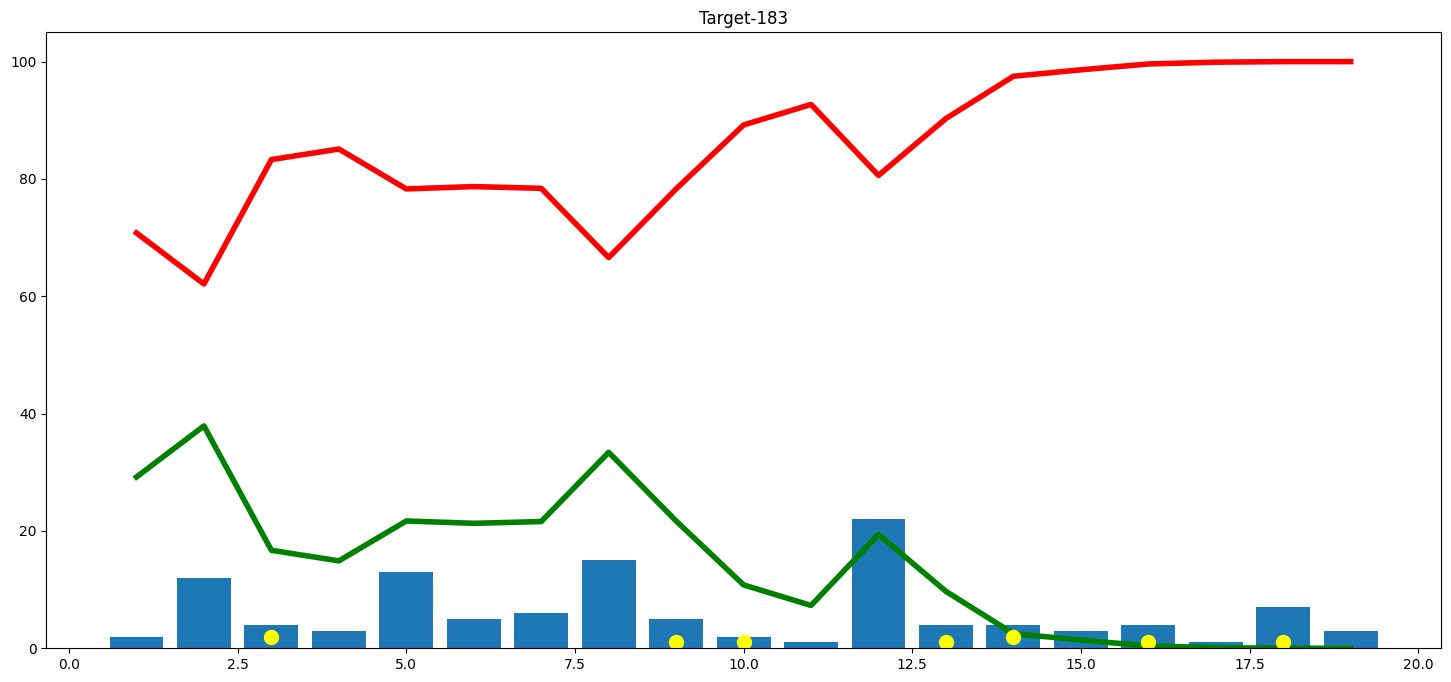

In [660]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(temp_df['end_of_over'], temp_df['win'], color='green', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)

# Filter 'wickets_in_over' data to keep values greater than or equal to 1
filtered_wickets = temp_df[temp_df['wickets_in_over'] >= 1]

# Create a scatter plot for the filtered 'wickets_in_over' with yellow circles
plt.scatter(filtered_wickets['end_of_over'], filtered_wickets['wickets_in_over'], color='yellow', s=100, zorder=2)

# Create a bar plot for 'runs_after_over'
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], zorder=1)

plt.title('Target-' + str(target))
plt.show()


In [661]:
import joblib
joblib.dump(pipe, 'cricketpred.pkl')

['cricketpred.pkl']